In [2]:
!pip install scipy

     -------------------------------------- 42.5/42.5 MB 700.5 kB/s eta 0:00:00


In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq
from sklearn import preprocessing

In [2]:
exp_path = 'Опыты от 18.02.23'
Path = os.getcwd()
Path = f'{Path}/{exp_path}'
all_signals = pd.read_csv(f'{exp_path}_signal_data.csv',)
all_signals = all_signals.fillna(0)
all_signals

,channel,num_exp,count_dot,0,1,2,3,4,5,6,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,ch1,"1_0,1",2000.0,-107.0,-55.0,38.0,-26.0,-124.0,-54.0,46.0,...,-53.0,-31.0,-31.0,-24.0,-19.0,-33.0,-50.0,-41.0,-16.0,1.0
1,ch1,"1_0,1",2000.0,-106.0,-28.0,64.0,-23.0,-119.0,-20.0,72.0,...,-51.0,-34.0,-31.0,-28.0,-27.0,-33.0,-41.0,-38.0,-21.0,4.0
2,ch1,"1_0,1",2000.0,103.0,74.0,-13.0,27.0,108.0,67.0,-20.0,...,-28.0,-20.0,-13.0,-27.0,-41.0,-28.0,-8.0,-8.0,-9.0,9.0
3,ch1,"1_0,1",2000.0,-92.0,-7.0,74.0,-20.0,-104.0,3.0,82.0,...,-49.0,-35.0,-29.0,-28.0,-29.0,-31.0,-31.0,-30.0,-18.0,10.0
4,ch1,"1_0,1",2000.0,-93.0,-66.0,18.0,-22.0,-110.0,-67.0,23.0,...,-54.0,-28.0,-29.0,-23.0,-15.0,-29.0,-49.0,-40.0,-14.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,ch2,3_6,2000.0,50.0,85.0,78.0,136.0,352.0,523.0,257.0,...,151.0,638.0,594.0,191.0,112.0,418.0,448.0,-69.0,-511.0,-345.0
296,ch2,3_6,2000.0,73.0,84.0,88.0,223.0,464.0,471.0,-45.0,...,423.0,701.0,411.0,89.0,240.0,498.0,241.0,-341.0,-505.0,-156.0
297,ch2,3_6,2000.0,77.0,82.0,95.0,248.0,485.0,444.0,-121.0,...,483.0,694.0,362.0,82.0,277.0,497.0,172.0,-399.0,-488.0,-121.0
298,ch2,3_6,2000.0,83.0,78.0,114.0,307.0,517.0,349.0,-316.0,...,592.0,647.0,257.0,95.0,366.0,468.0,8.0,-496.0,-414.0,-46.0


In [3]:
SAMPLE_RATE = 2*10**6  # Гц
DURATION = 1000*10**-6  # Секунды
one_signal = all_signals[:1]
one_signal = one_signal.loc[:, "0":"1999":1]
one_signal = preprocessing.normalize(one_signal,axis=1)
one_signal

array([[-1.96269352e-03, -1.00886115e-03,  6.97031343e-04, ...,
        -7.52060133e-04, -2.93486881e-04,  1.83429301e-05]])

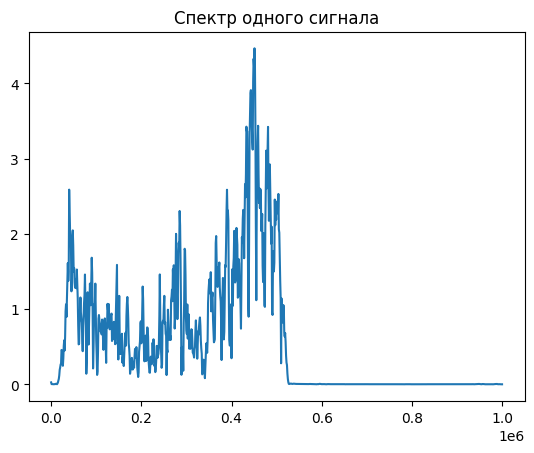

In [5]:
N = SAMPLE_RATE * DURATION
yf = rfft(one_signal)
xf = rfftfreq(int(N), 1/float(SAMPLE_RATE))
plt.plot(xf, np.abs(yf[0]))
plt.title('Спектр одного сигнала')
plt.show()

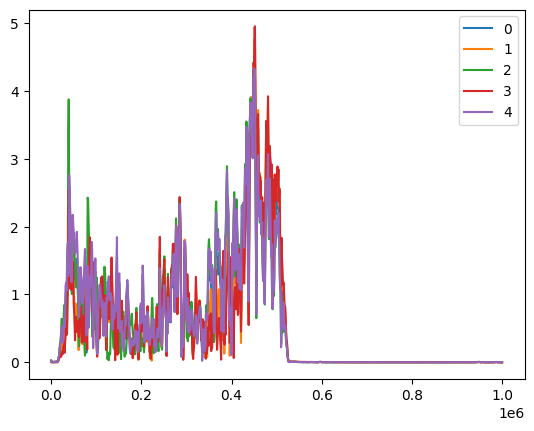

In [6]:
SAMPLE_RATE = 2*10**6  # Гц
DURATION = 1000*10**-6  # Секунды
signal_ch1_0_1 = all_signals[:5]
signal_ch1_0_1 = signal_ch1_0_1.loc[:, "0":"1999":1]
index_signal = signal_ch1_0_1.index
for i in range(len(signal_ch1_0_1)):
    one_signal = pd.DataFrame(signal_ch1_0_1.iloc[index_signal[i]])
    one_signal = preprocessing.normalize(one_signal,axis=0)
    N = SAMPLE_RATE * DURATION
    yf = rfft(one_signal.T)
    xf = rfftfreq(int(N), 1/float(SAMPLE_RATE))
    plt.plot(xf, np.abs(yf[0]))
plt.legend(index_signal)
plt.show()


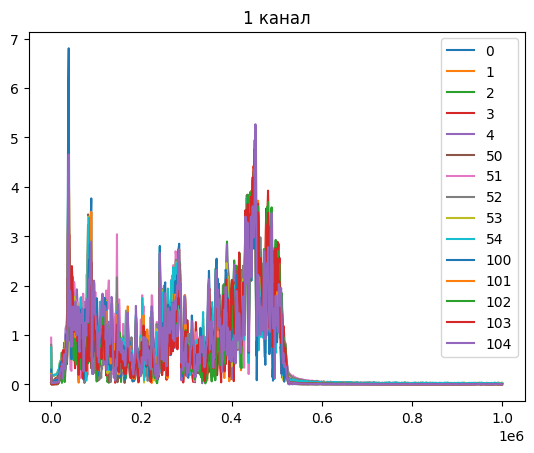

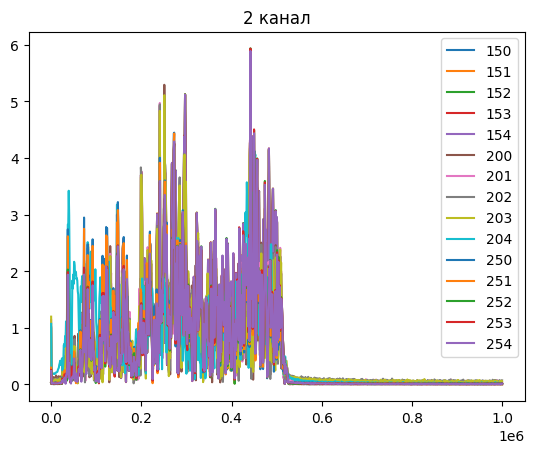

In [7]:
signals = all_signals[all_signals["num_exp"].str.contains("_0,1")]  # фильтр данных только для длительности 0.1
SAMPLE_RATE = 2*10**6  # Гц
DURATION = 1000*10**-6  # Секунды
one_signal = signals
ch1 = one_signal[one_signal['channel']=='ch1']  # Разбивка по каналам
ch2 = one_signal[one_signal['channel']=='ch2']
ch1 = ch1.loc[:, "0":"1999":1] # Выбор столбцов только с сигналом потому что первые столбцы это канал и номер опыта
ch2 = ch2.loc[:, "0":"1999":1]
index_ch1 = ch1.index  # Чтобы вставить легенду номера индексов строки (опыта) из датафрейма
index_ch2 = ch2.index
for i in range(len(ch1)):
    one_signal = pd.DataFrame(ch1.iloc[i])
    one_signal = preprocessing.normalize(one_signal,axis=0)
    N = SAMPLE_RATE * DURATION
    yf = rfft(one_signal.T)
    xf = rfftfreq(int(N), 1/float(SAMPLE_RATE))
    plt.plot(xf, np.abs(yf[0]))
plt.title('1 канал')
plt.legend(index_ch1)
plt.show()
for i in range(len(ch2)):
    one_signal = pd.DataFrame(ch2.iloc[i])
    one_signal = preprocessing.normalize(one_signal,axis=0)
    N = SAMPLE_RATE * DURATION
    yf = rfft(one_signal.T)
    xf = rfftfreq(int(N), 1/float(SAMPLE_RATE))
    plt.plot(xf, np.abs(yf[0]))
plt.title('2 канал')
plt.legend(index_ch2)
plt.show()